### Import the dependacies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

### Load the dataset

In [2]:
df = pd.read_csv('customer_churn.csv') 
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4715,7508-DQAKK,Female,0,No,No,64,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),86.40,5442.05,No
4898,8993-PHFWD,Female,0,No,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,25.25,58.9,Yes
5088,1399-OUPJN,Female,0,Yes,Yes,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.75,1272.05,No
5249,5115-GZDEL,Male,0,No,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.7,No
4942,2626-URJFX,Male,0,Yes,Yes,4,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,50.90,225.6,Yes


In [3]:
df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df1 = df.drop('customerID', axis=1) 
df1.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
55,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes


In [6]:
df1.TotalCharges 

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
df = df1[pd.to_numeric(df1.TotalCharges, errors='coerce').isnull()]
df.shape

(11, 20)

In [11]:
df1.shape  

(7043, 20)

In [13]:
df1 = df1[df1.TotalCharges != ' ']
df1.shape 

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) 
df1.dtypes

C:\Users\madhu\AppData\Local\Temp\ipykernel_24548\3252295955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
df1.sample() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5131,Female,0,Yes,No,44,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.1,4364.1,Yes


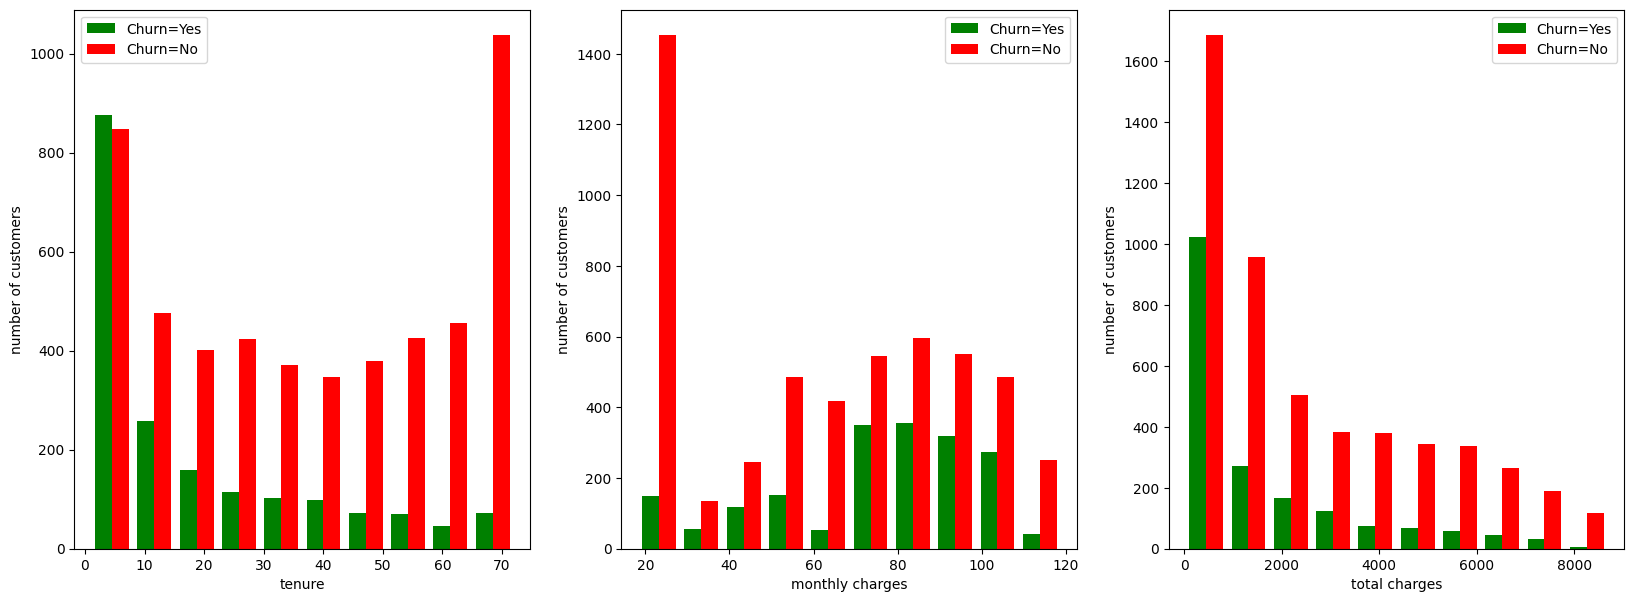

In [30]:
tenure_churn_yes = df1.tenure[df1.Churn == 'Yes']
tenure_churn_no = df1.tenure[df1.Churn == 'No']

mc_churn_yes = df1.MonthlyCharges[df1.Churn == 'Yes']
mc_churn_no = df1.MonthlyCharges[df1.Churn == 'No']

tc_churn_yes = df1.TotalCharges[df1.Churn == 'Yes']
tc_churn_no = df1.TotalCharges[df1.Churn == 'No'] 

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.xlabel('tenure')
plt.ylabel('number of customers')
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.subplot(1,3,2)
plt.xlabel('monthly charges')
plt.ylabel('number of customers')
plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.subplot(1,3,3)
plt.xlabel('total charges')
plt.ylabel('number of customers')
plt.hist([tc_churn_yes, tc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()


Text(0.5, 1.0, 'Total Charges Boxplot')

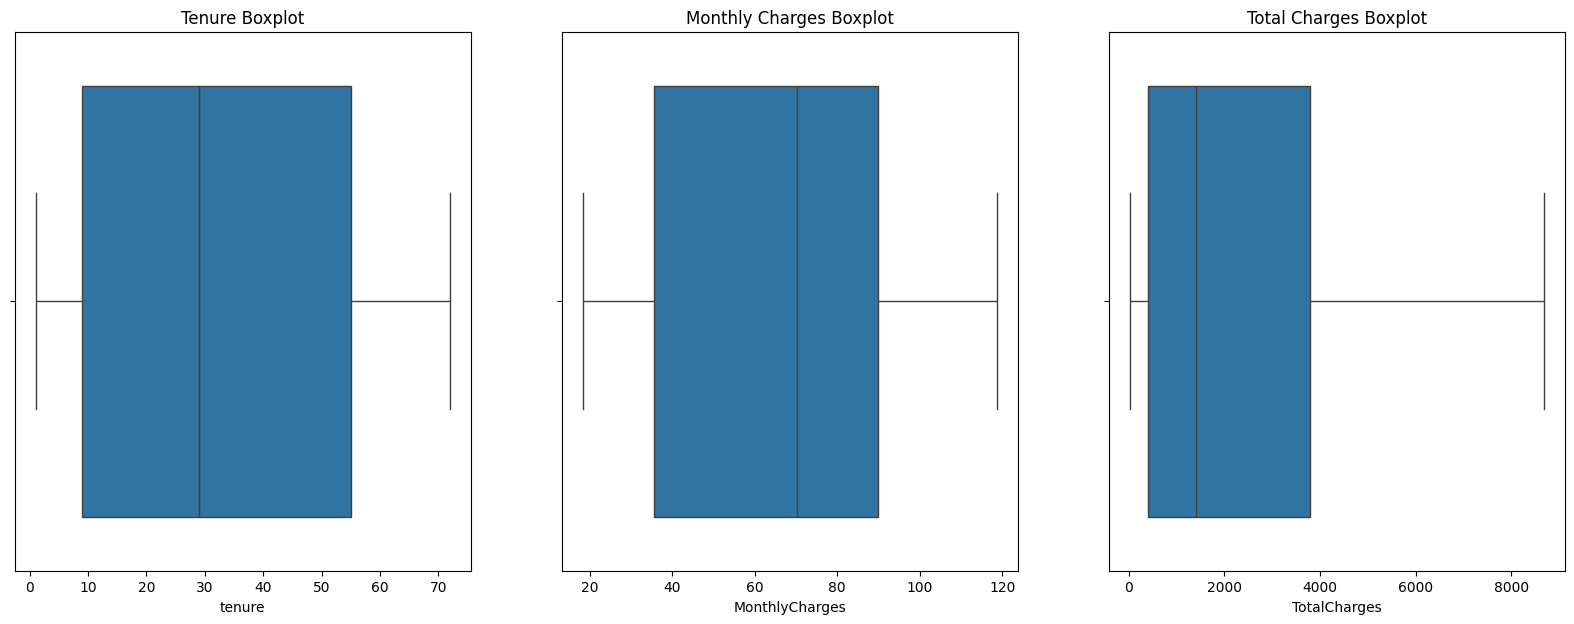

In [32]:
import seaborn as sn 

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sn.boxplot(data=df1, x='tenure')
plt.title('Tenure Boxplot')

plt.subplot(1,3,2)
sn.boxplot(data=df1, x='MonthlyCharges')
plt.title('Monthly Charges Boxplot')

plt.subplot(1,3,3)
sn.boxplot(data=df1, x='TotalCharges')
plt.title('Total Charges Boxplot')